<a href="https://colab.research.google.com/github/Samarth-991/Medical-Data-Handling/blob/main/Data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np
import pandas as pd 
import os 
import pylab
import seaborn as sns
from glob import glob
import random
np.random.seed(30)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# ! unzip '/content/drive/My Drive/TB-DeepLearning/TBdata-20200919T130343Z-001.zip'

In [ ]:

TB_Path = '/content/data/TB'
Non_TBpath = '/content/data/nonTB'

tb_data = [os.path.join(TB_Path,tbpath) for tbpath in os.listdir(TB_Path) if tbpath.endswith('.WAV')]
nontb_data =[os.path.join(Non_TBpath,nontb_path) for nontb_path in os.listdir(Non_TBpath) if nontb_path.endswith('.WAV')]

print("number of TB files :",len(tb_data))
print("number of Non-TB files ",len(nontb_data))

number of TB files : 30
number of Non-TB files  40


In [ ]:
def get_melspectrum(wav_path):
  data, sample_rate = librosa.load(wav_path)   
  S = librosa.feature.melspectrogram(y=data, sr=sample_rate)
  return S

def get_file(data):
  path = data[random.randint(0,len(data))]
  label = os.path.split(path)[0].split('/')[3]
  return path,label

print(get_file(tb_data))

('/content/data/TB/Narsimham_7sec.WAV', 'TB')


Shape of Mel Spectrum (128, 304)
Shape of Mel Spectrum (128, 223)


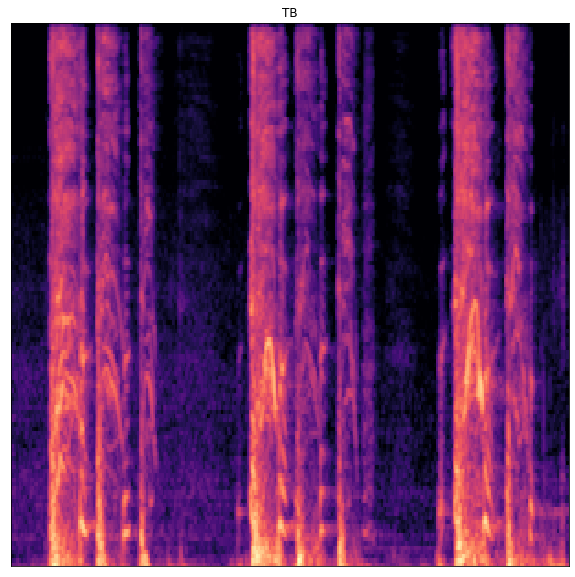

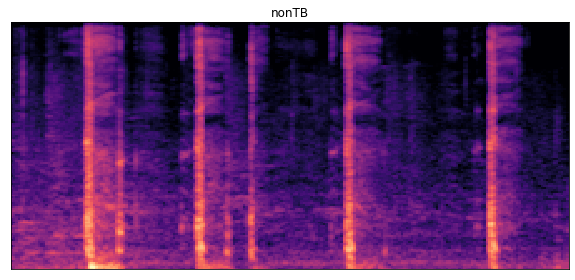

In [ ]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(1,1,1)
path ,label = get_file(tb_data)
S = get_melspectrum(wav_path=path)
librosa.display.specshow(librosa.power_to_db(S, ref=np.max))
plt.title(label)
print("Shape of Mel Spectrum",S.shape)

fig = plt.figure(figsize=(10,10))
ax2 = fig.add_subplot(2,1,1)
path ,label = get_file(nontb_data)
S = get_melspectrum(wav_path=path)
librosa.display.specshow(librosa.power_to_db(S, ref=np.max))
plt.title(label)

print("Shape of Mel Spectrum",S.shape)

## Understanding Mel Spectrum


Text(0.5, 1.0, 'TB')

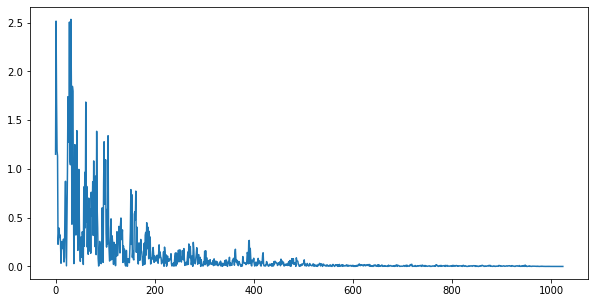

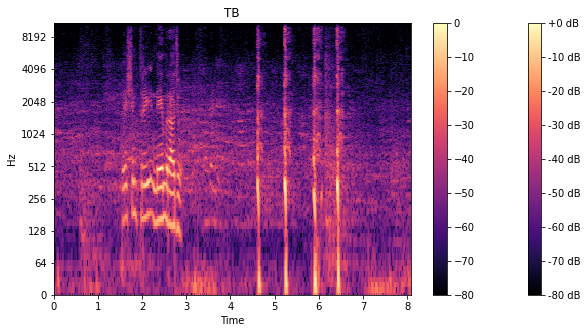

In [ ]:
path ,label = get_file(tb_data)
data, sample_rate = librosa.load(path)   

plt.figure(figsize=(10,5))
n_fft = 2048
D = np.abs(librosa.stft(data[:n_fft], n_fft=n_fft, hop_length=n_fft+1))
plt.plot(D);

plt.figure(figsize=(10,5))
hop_length = 512
D = np.abs(librosa.stft(data, n_fft=n_fft,  hop_length=hop_length))
DB = librosa.amplitude_to_db(D, ref=np.max)
librosa.display.specshow(DB, sr=sample_rate, hop_length=hop_length, x_axis='time', y_axis='log');
plt.colorbar(format='%+2.0f dB');
plt.colorbar();
plt.title (label)


(1025, 639)


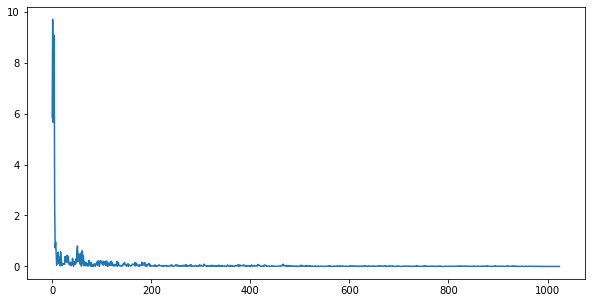

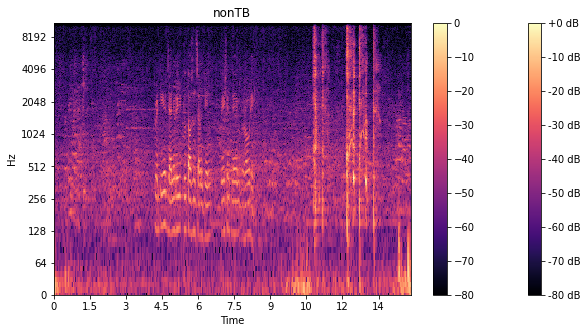

In [ ]:
path ,label = get_file(nontb_data)
data, sample_rate = librosa.load(path)   

plt.figure(figsize=(10,5))
n_fft = 2048
D = np.abs(librosa.stft(data[:n_fft], n_fft=n_fft, hop_length=n_fft+1))
plt.plot(D);


plt.figure(figsize=(10,5))
hop_length = 512
D = np.abs(librosa.stft(data, n_fft=n_fft,  hop_length=hop_length))
DB = librosa.amplitude_to_db(D, ref=np.max)
librosa.display.specshow(DB, sr=sample_rate, hop_length=hop_length, x_axis='time', y_axis='log');
plt.colorbar(format='%+2.0f dB');
plt.colorbar();
plt.title(label)
print(DB.shape)

## Using YAMNET by Google
Based on the directions at: https://github.com/tensorflow/models/tree/master/research/audioset



In [ ]:
!git clone https://github.com/tensorflow/models.git
!ls models/research/audioset

Cloning into 'models'...
remote: Enumerating objects: 57, done.
remote: Counting objects: 100% (57/57), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 45081 (delta 32), reused 36 (delta 15), pack-reused 45024
Receiving objects: 100% (45081/45081), 550.73 MiB | 31.35 MiB/s, done.
Resolving deltas: 100% (30819/30819), done.
README.md  vggish  yamnet


## Download Yamnet models

In [ ]:
!curl -o yamnet.h5 https://storage.googleapis.com/audioset/yamnet.h5
! cp -r /content/models/research/audioset/yamnet/* ./ 
! pip install resampy 
! pip install pysoundfile

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 14.5M  100 14.5M    0     0  22.5M      0 --:--:-- --:--:-- --:--:-- 22.5M


## Building Yamnet Model

In [ ]:
# Imports.
import numpy as np
import soundfile as sf
import params
import matplotlib.pyplot as plt
import tensorflow as tf

params.PATCH_HOP_SECONDS = 0.1  # 10 Hz scores frame rate.
params.patch_window_seconds = 0.96
params.stft_window_seconds= 0.025
params.stft_hop_seconds= 0.010
params.patch_hop_seconds = 0.1
params.tflite_compatible=False
params.mel_bands =128
params.conv_padding='same'
params.mel_min_hz=float(125.0)
params.mel_max_hz=float(7500.0)
params.log_offset=float(0.001)
params.patch_bands=params.mel_bands
params.patch_frames=int(96.0)
params.sample_rate=16000
params.batchnorm_center = True
params.batchnorm_scale= False
params.batchnorm_epsilon=float(1e-4)
params.classifier_activation= 'linear'

params.num_classes=521

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Model, layers
import yamnet as yamnet_model
# TODO: include my slightly modified yamnet code in this file 
# i added the 'dense_net' return

def load_yamnet(model_path):
  yamnet = yamnet_model.yamnet_frames_model(params)
  yamnet.load_weights(model_path)
  return yamnet

yamnet = load_yamnet('/content/yamnet.h5')
print(yamnet.summary())

Model: "yamnet_frames"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None,)]            0                                            
__________________________________________________________________________________________________
tf_op_layer_Shape_20 (TensorFlo [(1,)]               0           input_5[0][0]                    
__________________________________________________________________________________________________
tf_op_layer_strided_slice_4 (Te [()]                 0           tf_op_layer_Shape_20[0][0]       
__________________________________________________________________________________________________
tf_op_layer_Maximum_17 (TensorF [()]                 0           tf_op_layer_strided_slice_4[0][0]
______________________________________________________________________________________

In [ ]:
# Download audio for testing
!curl -O https://storage.googleapis.com/audioset/speech_whistling2.wav

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  153k  100  153k    0     0  9046k      0 --:--:-- --:--:-- --:--:-- 9046k


In [ ]:
wav_data, sr = sf.read('/content/speech_whistling2.wav', dtype=np.int16)
waveform = wav_data / 32768.0

params.SAMPLE_RATE = sr
print("Sample rate =", params.SAMPLE_RATE)

Sample rate = 16000


In [ ]:
# Run the model.
scores, embeddings, spectrogram = yamnet(waveform)